### RFC

### import modules and configure notebook

In [26]:
import pandas as pd
import numpy as np
import swifter
import seaborn as sns
import matplotlib.pyplot

pd.set_option('max.rows', None)
pd.set_option('max.columns', None)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score

%matplotlib inline

### Load variables stored by data_preproccessing notebook

In [27]:
%store -r train_data_formodel
%store -r test_data
%store -r my_data
%store -r uniques
%store -r best_feats


In [28]:
save_plots = True


In [29]:
train_data_formodel.columns.values[9:-1]

array(['Li7', 'Be9', 'B11', 'Mg24', 'Al27', 'Si28', 'P31', 'S33', 'K39',
       'Ca42', 'Sc45', 'Ti47', 'V51', 'Cr52', 'Mn55', 'Fe56', 'Co59',
       'Ni60', 'Cu63', 'Zn68', 'Ga69', 'Ge72', 'As75', 'Rb85', 'Sr88',
       'Y89', 'Zr90', 'Nb93', 'Mo95', 'Cd111', 'In115', 'Sn118', 'Cs133',
       'Ba137', 'La139', 'Ce140', 'Pr141', 'Nd146', 'Sm147', 'Eu153',
       'Gd157', 'Tb159', 'Dy163', 'Ho165', 'Er166', 'Tm169', 'Yb172',
       'Lu175', 'Hf178', 'Ta181', 'Pb208', 'Th232', 'U238'], dtype=object)

#train_data = train_data_formodel[train_data_formodel.columns.values[9:,]]

train_data_pre_conc = train_data_formodel[best_feats]
train_data = pd.concat([train_data_pre_conc, train_data_formodel['class']], axis = 1)

In [30]:
train_data_formodel.head()

,Analysis,Geology,Province,Region,Site,SubSite,Formation,Band,Nodule,Li7,Be9,B11,Mg24,Al27,Si28,P31,S33,K39,Ca42,Sc45,Ti47,V51,Cr52,Mn55,Fe56,Co59,Ni60,Cu63,Zn68,Ga69,Ge72,As75,Rb85,Sr88,Y89,Zr90,Nb93,Mo95,Cd111,In115,Sn118,Cs133,Ba137,La139,Ce140,Pr141,Nd146,Sm147,Eu153,Gd157,Tb159,Dy163,Ho165,Er166,Tm169,Yb172,Lu175,Hf178,Ta181,Pb208,Th232,U238,class
0,10_FH1_1_1,Bedrock,Northern,NaN,FH,FH1,Burnham,FH1,FH1_1_1,15.63,0.12,48.36,154.63,943.71,464944.18,50.28,538.57,455.94,712.39,0.42,15.58,0.27,3.30,0.69,8.46,0.05,0.80,1.62,10.82,0.25,1.22,0.16,0.43,12.94,0.88,1.51,0.09,0.05,0.02,0.00,0.05,0.01,6.54,0.84,0.95,0.23,0.87,0.16,0.04,0.16,0.02,0.11,0.03,0.06,0.01,0.02,0.00,0.04,0.01,0.24,0.07,0.05,0
1,11_FH1_1_1,Bedrock,Northern,NaN,FH,FH1,Burnham,FH1,FH1_1_1,11.50,0.09,44.77,22.42,1077.11,465010.94,70.91,438.20,387.82,515.24,0.44,18.47,0.29,3.45,1.01,11.59,0.11,0.36,0.53,8.93,0.34,0.85,0.10,0.45,13.22,0.95,1.74,0.07,0.01,0.02,0.00,0.04,0.02,8.04,0.92,1.01,0.23,0.98,0.18,0.04,0.18,0.02,0.13,0.03,0.06,0.01,0.04,0.01,0.05,0.00,0.07,0.08,0.04,0
2,12_FH1_1_1,Bedrock,Northern,NaN,FH,FH1,Burnham,FH1,FH1_1_1,20.05,0.06,44.88,42.70,620.21,465295.41,104.47,372.66,363.71,957.89,0.76,19.89,0.55,3.25,1.21,87.99,0.21,1.68,1.53,11.98,0.25,1.71,0.13,0.43,8.52,0.87,0.93,0.10,0.02,0.02,0.00,0.05,0.01,3.13,0.90,1.08,0.26,0.84,0.15,0.04,0.19,0.02,0.14,0.02,0.07,0.01,0.06,0.00,0.02,0.01,0.46,0.05,0.05,0
3,13_FH1_1_2,Bedrock,Northern,NaN,FH,FH1,Burnham,FH1,FH1_1_2,11.16,0.73,47.06,162.42,1143.19,465099.89,56367.93,1075.89,547.55,2174.30,0.43,42.30,0.67,152.42,4.84,145.34,0.30,2.45,5.02,17.15,0.35,2.13,0.84,0.76,13.16,0.97,2.00,0.10,0.29,0.18,0.01,0.78,0.04,8.74,0.93,0.95,0.21,0.75,0.13,0.04,0.25,0.02,0.09,0.03,0.05,0.00,0.03,0.00,0.08,0.00,0.64,0.05,0.03,0
4,14_FH1_1_2,Bedrock,Northern,NaN,FH,FH1,Burnham,FH1,FH1_1_2,17.71,0.32,48.26,33.52,547.22,465027.11,44.44,464.78,278.25,1551.63,0.71,11.18,0.27,2.56,1.73,25.38,0.05,0.80,0.55,9.80,0.41,1.41,0.12,0.28,9.90,0.90,0.90,0.08,0.04,0.10,0.00,0.09,0.01,2.74,0.97,1.09,0.27,1.00,0.17,0.04,0.19,0.02,0.15,0.03,0.05,0.01,0.05,0.01,0.02,0.01,0.59,0.06,0.09,0


In [31]:
y = np.array(train_data_formodel['class'])

In [32]:
train_data_feats = train_data_formodel[train_data_formodel.columns.values[9:-1]]

In [33]:
train_data_feats.shape

(1243, 53)

### Turn feature data and class to be predicited into numpy arrays

In [34]:
X = np.array(train_data_feats)

In [35]:
print(X.shape)
print(y.shape)

(1243, 53)
(1243,)


### Carry out 10-f0ld stratified cross validation, class f1 scores and macro f1 scores with weighted averages are calculated

In [36]:
RFC = RandomForestClassifier(n_estimators=2000, random_state=42)
skf = StratifiedKFold(n_splits=10, random_state=42)
skf.get_n_splits(X, y)
class_f1_scores = []
macro_f1_scores = []
accuracy_scores = []
feat_imp =[]
f1_dict = {}
feat_imp_dict = {}
count = 0
for train_index, test_index in skf.split(X, y):
    count = count + 1
    print('making model:')
    key = 'round' + str(count)
    print(count)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    RFC.fit(X_train, y_train)
    y_pred = RFC.predict(X_test)
    class_f1_scores = f1_score(y_test, y_pred, average = None)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    macro_f1_scores.append(f1_score(y_test, y_pred, average = 'weighted'))
    f1_dict[key] = class_f1_scores 
    feat_imp_dict[key] = RFC.feature_importances_

making model:
1


/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


making model:
2


/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


making model:
3


/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


making model:
4
making model:
5


/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


making model:
6


/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


making model:
7


/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


making model:
8


/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


making model:
9
making model:
10


/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/robert/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [37]:
f1_df = pd.DataFrame(data = f1_dict)


In [38]:
f1_df.head()

,round1,round2,round3,round4,round5,round6,round7,round8,round9,round10
0,0.909091,1.000000,1.000000,0.909091,1.000000,1.0,1.000000,0.888889,1.0,1.000000
1,0.666667,0.666667,0.800000,0.857143,1.000000,1.0,0.666667,0.800000,1.0,0.800000
2,0.750000,1.000000,1.000000,1.000000,1.000000,1.0,0.857143,1.000000,1.0,1.000000
3,0.666667,1.000000,0.666667,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000
4,0.880000,0.916667,0.846154,0.916667,0.956522,0.9,1.000000,0.833333,1.0,0.869565


In [39]:
for key in f1_dict:
    print(len(f1_dict[key]))

28
28
28
28
28
28
28
28
28
28


### Below are the encodings for the class variable

In [40]:
print(train_data_formodel['class'].unique())
print(list(uniques))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
['FH', 'ER', 'WW', 'TC', 'CS', 'BC', 'KQ', 'AR', 'SL', 'FG', 'WB', 'BX', 'PF', 'BM', 'WH', 'SQ', 'BP', 'WN', 'BH', 'PH', 'LB', 'AB', 'LV', 'SE', 'BA', 'SV', 'WA', 'MM']


In [41]:
f1_df_final = pd.concat([f1_df, pd.Series(uniques)], axis = 1)

In [42]:
f1_df_final

,round1,round2,round3,round4,round5,round6,round7,round8,round9,round10,0
0,0.909091,1.000000,1.000000,0.909091,1.000000,1.000000,1.000000,0.888889,1.000000,1.000000,FH
1,0.666667,0.666667,0.800000,0.857143,1.000000,1.000000,0.666667,0.800000,1.000000,0.800000,ER
2,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.857143,1.000000,1.000000,1.000000,WW
3,0.666667,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,TC
4,0.880000,0.916667,0.846154,0.916667,0.956522,0.900000,1.000000,0.833333,1.000000,0.869565,CS
5,0.800000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000,0.666667,0.800000,0.500000,BC
6,0.750000,0.750000,0.666667,1.000000,1.000000,0.000000,0.333333,0.000000,1.000000,1.000000,KQ
7,0.800000,0.571429,0.666667,0.500000,0.800000,1.000000,0.750000,0.600000,0.571429,0.333333,AR
8,1.000000,1.000000,1.000000,0.500000,0.800000,1.000000,0.857143,1.000000,0.800000,0.500000,SL
9,0.750000,0.800000,0.000000,1.000000,1.000000,0.666667,0.857143,0.666667,1.000000,1.000000,FG


In [43]:
f1_df_final.rename(columns={0:'class'}, inplace=True)
f1_df_final.set_index('class', drop = True, inplace = True)

In [44]:
f1_df_final

,round1,round2,round3,round4,round5,round6,round7,round8,round9,round10
class,,,,,,,,,,
FH,0.909091,1.000000,1.000000,0.909091,1.000000,1.000000,1.000000,0.888889,1.000000,1.000000
ER,0.666667,0.666667,0.800000,0.857143,1.000000,1.000000,0.666667,0.800000,1.000000,0.800000
WW,0.750000,1.000000,1.000000,1.000000,1.000000,1.000000,0.857143,1.000000,1.000000,1.000000
TC,0.666667,1.000000,0.666667,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
CS,0.880000,0.916667,0.846154,0.916667,0.956522,0.900000,1.000000,0.833333,1.000000,0.869565
BC,0.800000,1.000000,0.500000,1.000000,1.000000,1.000000,0.000000,0.666667,0.800000,0.500000
KQ,0.750000,0.750000,0.666667,1.000000,1.000000,0.000000,0.333333,0.000000,1.000000,1.000000
AR,0.800000,0.571429,0.666667,0.500000,0.800000,1.000000,0.750000,0.600000,0.571429,0.333333
SL,1.000000,1.000000,1.000000,0.500000,0.800000,1.000000,0.857143,1.000000,0.800000,0.500000


In [45]:
f1_df_final.T

class,FH,ER,WW,TC,CS,BC,KQ,AR,SL,FG,WB,BX,PF,BM,WH,SQ,BP,WN,BH,PH,LB,AB,LV,SE,BA,SV,WA,MM
round1,0.909091,0.666667,0.750000,0.666667,0.880000,0.800000,0.750000,0.800000,1.000000,0.750000,0.0,0.000000,1.000000,0.000000,0.909091,0.800000,0.000000,0.800000,0.857143,0.758621,0.666667,0.666667,0.857143,0.800000,0.181818,0.846154,0.727273,0.500000
round2,1.000000,0.666667,1.000000,1.000000,0.916667,1.000000,0.750000,0.571429,1.000000,0.800000,0.8,0.000000,0.800000,0.571429,0.888889,0.000000,0.000000,0.888889,0.857143,0.769231,0.615385,1.000000,1.000000,0.000000,0.705882,0.588235,0.666667,0.421053
round3,1.000000,0.800000,1.000000,0.666667,0.846154,0.500000,0.666667,0.666667,1.000000,0.000000,1.0,0.000000,0.857143,0.800000,0.727273,0.666667,0.000000,0.666667,0.666667,0.666667,0.666667,0.666667,1.000000,0.000000,0.636364,0.740741,0.571429,0.500000
round4,0.909091,0.857143,1.000000,1.000000,0.916667,1.000000,1.000000,0.500000,0.500000,1.000000,1.0,0.800000,0.666667,0.500000,0.666667,1.000000,0.666667,0.400000,0.800000,0.692308,0.923077,0.666667,0.500000,0.400000,0.800000,0.444444,0.451613,0.444444
round5,1.000000,1.000000,1.000000,1.000000,0.956522,1.000000,1.000000,0.800000,0.800000,1.000000,1.0,0.800000,0.800000,1.000000,0.800000,0.000000,0.666667,0.571429,0.888889,0.900000,0.555556,0.666667,0.500000,0.800000,0.533333,0.923077,0.615385,0.250000
round6,1.000000,1.000000,1.000000,1.000000,0.900000,1.000000,0.000000,1.000000,1.000000,0.666667,1.0,1.000000,0.800000,0.285714,0.666667,0.500000,0.000000,1.000000,1.000000,0.909091,0.857143,1.000000,1.000000,0.800000,0.533333,0.960000,0.545455,0.000000
round7,1.000000,0.666667,0.857143,1.000000,1.000000,0.000000,0.333333,0.750000,0.857143,0.857143,1.0,0.800000,0.750000,0.666667,0.888889,0.000000,1.000000,0.800000,0.500000,0.761905,0.833333,0.666667,0.800000,0.666667,0.555556,0.869565,0.800000,0.000000
round8,0.888889,0.800000,1.000000,1.000000,0.833333,0.666667,0.000000,0.600000,1.000000,0.666667,1.0,1.000000,1.000000,0.000000,0.666667,0.666667,0.000000,0.800000,0.857143,0.842105,0.923077,1.000000,0.000000,0.500000,0.777778,0.571429,0.545455,0.000000
round9,1.000000,1.000000,1.000000,1.000000,1.000000,0.800000,1.000000,0.571429,0.800000,1.000000,1.0,0.571429,0.857143,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.900000,0.909091,1.000000,1.000000,0.800000,0.923077,0.631579,0.307692,0.000000
round10,1.000000,0.800000,1.000000,1.000000,0.869565,0.500000,1.000000,0.333333,0.500000,1.000000,1.0,0.444444,0.857143,0.800000,0.600000,0.000000,1.000000,0.400000,0.857143,0.800000,0.500000,0.000000,1.000000,1.000000,0.933333,0.166667,0.416667,0.000000


### Boxplot showing the distribution of class f1 scores from 10 models

FileNotFoundError: [Errno 2] No such file or directory: 'output/site_specific_f1_scores.png'

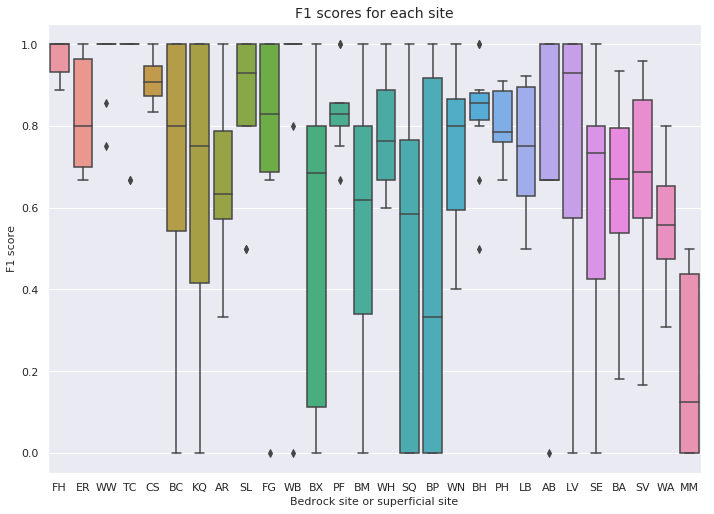

In [46]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
plot = sns.boxplot(data = f1_df_final.T)
plot.set_title('F1 scores for each site', fontdict={'fontsize': 14})
plot.set_ylabel('F1 score', fontdict={'fontsize': 11})
plot.set_xlabel("Bedrock site or superficial site", fontdict={'fontsize': 11})

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig('output/site_specific_f1_scores.png')

In [ ]:
pd.DataFrame(data = f1_df_final.T.median()).to_csv('output/median_class_f1_scores.csv')

### Boxplot showing the macro F1 score with weighted averages

In [ ]:
plot = sns.boxplot(macro_f1_scores)
plot.set_title('Average-weighted macro-f1 score', fontdict={'fontsize': 14})
plot.set_xlabel("F1-score", fontdict={'fontsize': 11})

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig('output/macro_f1_scores.png')

In [ ]:
pd.Series(pd.Series(macro_f1_scores).median()).to_csv('output/median_macro_f1.csv')

### Boxplot showing accuracy scores

In [ ]:
sns.boxplot(accuracy_scores)

### Get feature importances

In [ ]:
feat_imp_df = pd.DataFrame(data = feat_imp_dict)
feat_imp_df

In [ ]:
train_data_formodel.columns

In [ ]:
feat_imp_df_final = pd.concat([feat_imp_df, pd.Series(my_data.columns.values[9:-1])], axis = 1)
feat_imp_df_final.rename(columns = {0:'element'}, inplace = True )
feat_imp_df_final

In [ ]:
feat_imp_df_final.set_index('element', inplace=True)


In [ ]:
feat_imp_df_final_plot = feat_imp_df_final.T

In [ ]:
feat_imp_df_final_plot

elements = feat_imp_df_final_plot.columns.values 
mean_feature_importance = []
for col in list(feat_imp_df_final_plot.columns.values):
    mean_feature_importance.append(feat_imp_df_final_plot[col].mean())
    

In [ ]:
mean_feature_importance_df = pd.concat([pd.Series(elements), pd.Series(mean_feature_importance)], axis = 1)

In [ ]:
mean_feature_importance_df.rename(columns={0:'elements', 1:'mean_importance'}, inplace=True)

In [ ]:
mean_feature_importance_df.sort_values(by='mean_importance', ascending=False, inplace=True)

In [ ]:
ordered_col_names = list(mean_feature_importance_df['elements'])

In [ ]:
sns.set_style("whitegrid")
sns.set_style()
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.boxplot(data = feat_imp_df_final_plot[ordered_col_names])
plot.set_xticklabels(plot.get_xticklabels(),rotation=90, ha = 'left')
plot.set_title('Feature (element) importance', fontdict={'fontsize': 20})
plot.set_ylabel('Feature importance', fontdict={'fontsize': 15})
plot.set_xlabel("Element", fontdict={'fontsize': 15})

if save_plots == True:
    fig = plot.get_figure()
    fig.savefig('output/feature_importances.png')

### Model is built for predicting source of artefacts 

In [47]:
RFC_final = RandomForestClassifier(n_estimators=800, )

In [48]:
RFC_final.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=800, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [49]:
print(train_data_formodel['class'].unique())
print(uniques)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
Index(['FH', 'ER', 'WW', 'TC', 'CS', 'BC', 'KQ', 'AR', 'SL', 'FG', 'WB', 'BX',
       'PF', 'BM', 'WH', 'SQ', 'BP', 'WN', 'BH', 'PH', 'LB', 'AB', 'LV', 'SE',
       'BA', 'SV', 'WA', 'MM'],
      dtype='object')


In [50]:
df_for_identifiers = test_data.copy(deep = True)
identifiers =  df_for_identifiers['Analysis']

### Predictions are made for the artefacts

In [51]:
y_pred = RFC_final.predict(np.array(test_data[test_data.columns.values[9:-1]]))

y_pred_proba = RFC_final.predict_proba(np.array(test_data[test_data.columns.values[9:-1]]))


In [52]:
probabilities_df = pd.DataFrame(data = y_pred_proba, columns = uniques)
probabilities_df_final = pd.concat([probabilities_df, pd.Series(list(identifiers))], axis = 1)

In [53]:
probabilities_df_final.rename(columns = {0:'identifier'}, inplace=True)

In [54]:
final_pred_df = pd.concat([pd.Series(y_pred), probabilities_df_final], axis = 1)

In [55]:
final_pred_df.rename(columns={0:'class_number'}, inplace = True)

In [56]:
final_pred_df.to_csv('output/predictions.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'output/predictions.csv'

In [57]:
uniques_list = list(uniques)
def get_pred_names(row):
    return(uniques_list[row['class_number']])
final_pred_df['class_predictions'] = final_pred_df.apply(get_pred_names, axis = 1)

In [58]:
#final_pred_df_modal = final_pred_df.groupby(by = 'class_number')

In [60]:
final_pred_df.head(100)

,class_number,FH,ER,WW,TC,CS,BC,KQ,AR,SL,FG,WB,BX,PF,BM,WH,SQ,BP,WN,BH,PH,LB,AB,LV,SE,BA,SV,WA,MM,identifier,class_predictions
0,19,0.005114,0.005994,0.00875,0.01750,0.01750,0.05375,0.02375,0.00625,0.00750,0.01250,0.013906,0.00500,0.00250,0.01125,0.01000,0.03000,0.00625,0.00875,0.02500,0.170540,0.02625,0.07250,0.06500,0.025156,0.070540,0.16875,0.09375,0.03625,06_DH1_1,PH
1,25,0.005000,0.005000,0.00625,0.01125,0.02000,0.06750,0.01875,0.00875,0.00875,0.01125,0.015000,0.00250,0.00375,0.01375,0.00875,0.03625,0.00625,0.01000,0.04250,0.150000,0.02750,0.06250,0.07875,0.023750,0.052500,0.16250,0.10250,0.03875,07_DH1_2,SV
2,25,0.006250,0.013750,0.01250,0.01875,0.01250,0.04500,0.01500,0.00625,0.00500,0.00750,0.012500,0.00375,0.00125,0.01500,0.01250,0.01875,0.00875,0.01375,0.04625,0.105000,0.02750,0.09000,0.10125,0.010000,0.057500,0.21000,0.08000,0.04375,08_DH1_3,SV
3,24,0.031250,0.009062,0.02000,0.00500,0.00000,0.00500,0.04000,0.00375,0.01000,0.06625,0.002656,0.00000,0.00875,0.00375,0.00250,0.00375,0.01750,0.00625,0.09625,0.040313,0.00875,0.02000,0.02875,0.073906,0.242812,0.12125,0.10250,0.03000,09_DH2_1,BA
4,24,0.022614,0.012959,0.01375,0.00125,0.00125,0.01500,0.02125,0.00625,0.01750,0.05500,0.000335,0.00625,0.02875,0.00500,0.00125,0.01250,0.00875,0.00625,0.05375,0.035718,0.01000,0.01750,0.01875,0.107835,0.241790,0.06375,0.18375,0.03125,10_DH2_2,BA
5,24,0.011333,0.011500,0.00500,0.00125,0.00250,0.01750,0.03375,0.00500,0.01625,0.03750,0.002583,0.00500,0.03125,0.00375,0.00000,0.01375,0.00625,0.01125,0.05625,0.088000,0.00750,0.02250,0.02750,0.070250,0.263833,0.06625,0.15375,0.02875,11_DH2_3,BA
6,25,0.011351,0.044632,0.05375,0.09500,0.04125,0.02250,0.00250,0.01375,0.01625,0.00125,0.007206,0.02000,0.00500,0.02125,0.01875,0.00375,0.00750,0.00250,0.00250,0.050161,0.01750,0.00875,0.01625,0.018166,0.058484,0.18125,0.09500,0.16375,12_DH3_1,SV
7,25,0.010000,0.095000,0.02750,0.08375,0.02375,0.01625,0.00250,0.00875,0.01500,0.00250,0.002500,0.01750,0.00000,0.02500,0.01625,0.00250,0.00375,0.00625,0.00500,0.021250,0.03875,0.00000,0.01875,0.012500,0.020000,0.24125,0.13875,0.14500,13_DH3_2,SV
8,25,0.005243,0.015925,0.01125,0.02875,0.02875,0.02625,0.00625,0.00500,0.00875,0.00125,0.012858,0.01625,0.00375,0.02500,0.01625,0.00500,0.00875,0.00375,0.00125,0.038463,0.02250,0.01500,0.05125,0.028345,0.082917,0.20875,0.15625,0.16625,14_DH3_3,SV
9,25,0.005250,0.002875,0.01000,0.00625,0.02250,0.01375,0.00625,0.00250,0.01875,0.00375,0.061250,0.00250,0.00000,0.01500,0.01375,0.00750,0.00375,0.00875,0.02375,0.187750,0.02250,0.07125,0.13125,0.005250,0.023875,0.21875,0.05625,0.05500,15_DH4_1,SV
